In [206]:
#Import all the tools

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.colors import ListedColormap
from sklearn import feature_selection
from sklearn.neighbors import KNeighborsClassifier as KNN
from ggplot import *

## Getting the data ready

In [135]:
# Load the data as CSV, separate based on commas, no header
fp = pd.read_csv("FPv3.csv", delimiter = ',', header=False)

In [136]:
# Check out the dataframe. I have the date, stock price, year-to-date return, and the various rating of different brokers.
# What I'm trying to predict is the next upgrade/downgrade based on exisiting data. 
fp.head()

,Date,Price,YTD,Citi,HSBC,Morgan Stanley,Nomura,JPMorgan,Credit Suisse,Macquarie,Barclays,Standard Chartered,BNP Paribas Equity Research,Jefferies,China International Capital Corp,BofAML,UBS,Goldman Sachs
0,1/1/2012,10.10,0.000000,buy,underweight,Equalwt/Attractive,NaN,underweight,neutral,outperform,overwt/positive,in-line,NaN,buy,accumulate,buy,buy,neutral/neutral
1,1/2/2012,10.10,0.000000,buy,underweight,Equalwt/Attractive,NaN,underweight,neutral,outperform,overwt/positive,in-line,NaN,buy,accumulate,buy,buy,neutral/neutral
2,1/3/2012,10.10,0.000000,buy,underweight,Equalwt/Attractive,NaN,underweight,neutral,outperform,overwt/positive,in-line,NaN,buy,accumulate,buy,buy,neutral/neutral
3,1/4/2012,10.22,0.011881,buy,underweight,Equalwt/Attractive,NaN,underweight,neutral,outperform,overwt/positive,in-line,NaN,buy,accumulate,buy,buy,neutral/neutral
4,1/5/2012,10.38,0.027723,buy,underweight,Equalwt/Attractive,NaN,underweight,neutral,outperform,overwt/positive,in-line,NaN,buy,accumulate,buy,buy,neutral/neutral


In [137]:
# Looks like everything is in the form of object
fp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 0 to 1225
Data columns (total 18 columns):
Date                                1226 non-null object
Price                               1226 non-null float64
YTD                                 1226 non-null float64
Citi                                1226 non-null object
HSBC                                1226 non-null object
Morgan Stanley                      1226 non-null object
Nomura                              1181 non-null object
JPMorgan                            1226 non-null object
Credit Suisse                       1226 non-null object
Macquarie                           1226 non-null object
Barclays                            1016 non-null object
Standard Chartered                  1104 non-null object
BNP Paribas Equity Research         1211 non-null object
Jefferies                           1226 non-null object
China International Capital Corp    1226 non-null object
BofAML                              

In [138]:
# Attributes are case sensitive
fp.Citi.value_counts()

sell       626
neutral    424
buy        176
dtype: int64

## Transform the data

In [139]:
#Replace string ratings into number ratings
fp1 = fp.replace({'buy': 3, 'overweight' : 3, 'outperform': 3, 'Overwt/Attractive': 3, 'overwt/positive': 3, 
                       'accumulate' : 3, 'Buy/Neutral' :3, 'buy-s/t sell' : 3, 
                       'neutral' : 2, 'Equalwt/Attractive' : 2, 'equalweight' : 2, 'in-line' : 2, 'hold' :2, 
                       'neutral/neutral' : 2, 'neutral-s/t sell' : 2, 'Equalwt/In-Line' : 2,
                       'sell' :1, 'underweight': 1, 'Underwt/In-Line': 1, 'reduce' : 1, 'Underwt/In-Line': 1, 
                       'Underwt/Cautious': 1, 'underperform': 1, 'Underwt/Cautious' : 1, 
                       'suspended coverage' : 0, 'restricted': 0, '#N/A' :0} )

In [140]:
# We still got the problem of NaNs
fp1.head()

,Date,Price,YTD,Citi,HSBC,Morgan Stanley,Nomura,JPMorgan,Credit Suisse,Macquarie,Barclays,Standard Chartered,BNP Paribas Equity Research,Jefferies,China International Capital Corp,BofAML,UBS,Goldman Sachs
0,1/1/2012,10.10,0.000000,3,1,2,NaN,1,2,3,3,2,NaN,3,3,3,3,2
1,1/2/2012,10.10,0.000000,3,1,2,NaN,1,2,3,3,2,NaN,3,3,3,3,2
2,1/3/2012,10.10,0.000000,3,1,2,NaN,1,2,3,3,2,NaN,3,3,3,3,2
3,1/4/2012,10.22,0.011881,3,1,2,NaN,1,2,3,3,2,NaN,3,3,3,3,2
4,1/5/2012,10.38,0.027723,3,1,2,NaN,1,2,3,3,2,NaN,3,3,3,3,2


In [149]:
# Now we remove the NaNs
fp2 = fp1.fillna(1)

In [142]:
# Most of the object formats have been converted into either a float or a int
fp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 0 to 1225
Data columns (total 18 columns):
Date                                1226 non-null object
Price                               1226 non-null float64
YTD                                 1226 non-null float64
Citi                                1226 non-null int64
HSBC                                1226 non-null int64
Morgan Stanley                      1226 non-null int64
Nomura                              1226 non-null float64
JPMorgan                            1226 non-null int64
Credit Suisse                       1226 non-null int64
Macquarie                           1226 non-null int64
Barclays                            1226 non-null float64
Standard Chartered                  1226 non-null float64
BNP Paribas Equity Research         1226 non-null float64
Jefferies                           1226 non-null int64
China International Capital Corp    1226 non-null int64
BofAML                              1226

In [143]:
# Now we can describe the columns 
fp2.describe()

,Price,YTD,Citi,HSBC,Morgan Stanley,Nomura,JPMorgan,Credit Suisse,Macquarie,Barclays,Standard Chartered,BNP Paribas Equity Research,Jefferies,China International Capital Corp,BofAML,UBS,Goldman Sachs
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.00000,1226.000000,1226.000000,1226,1226.000000,1226.000000,1226.000000,1226.000000
mean,9.635245,-0.001102,1.632953,2.106852,1.650897,2.238989,1.969005,1.860522,2.641925,2.39478,2.336052,2.442088,3,2.726754,2.997553,2.512235,2.358075
std,1.045279,0.128501,0.721013,0.893972,0.688437,0.874573,1.020933,0.647223,0.537420,1.12592,0.937886,0.565965,0,0.445808,0.085679,0.722985,0.479630
min,7.330000,-0.284153,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,3,2.000000,0.000000,0.000000,2.000000
25%,8.750000,-0.075000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.00000,2.000000,2.000000,3,2.000000,3.000000,2.000000,2.000000
50%,9.580000,0.001901,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.00000,3.000000,2.000000,3,3.000000,3.000000,3.000000,2.000000
75%,10.495000,0.090670,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.00000,3.000000,3.000000,3,3.000000,3.000000,3.000000,3.000000
max,11.860000,0.367059,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3,3.000000,3.000000,3.000000,3.000000


In [174]:
# Here I create a new column that sums up all the ratings by all the brokers
col_list = list(fp2) # Put the headings into a list
type(col_list) # This is a list. So we can use .remove
col_list.remove('Date') # Remove the columns which I don't want to sum
col_list.remove('Price')
col_list.remove('YTD')
fp2["sum"] = fp2[col_list].sum(axis=1) # Sum rest of the columns and add a new column with the result

In [175]:
fp2.head()

,Date,Price,YTD,Citi,HSBC,Morgan Stanley,Nomura,JPMorgan,Credit Suisse,Macquarie,Barclays,Standard Chartered,BNP Paribas Equity Research,Jefferies,China International Capital Corp,BofAML,UBS,Goldman Sachs,sum
0,1/1/2012,10.10,0.000000,3,1,2,1,1,2,3,3,2,1,3,3,3,3,2,33
1,1/2/2012,10.10,0.000000,3,1,2,1,1,2,3,3,2,1,3,3,3,3,2,33
2,1/3/2012,10.10,0.000000,3,1,2,1,1,2,3,3,2,1,3,3,3,3,2,33
3,1/4/2012,10.22,0.011881,3,1,2,1,1,2,3,3,2,1,3,3,3,3,2,33
4,1/5/2012,10.38,0.027723,3,1,2,1,1,2,3,3,2,1,3,3,3,3,2,33


In [192]:
# Pull out the features and put into a new dataframe
YTD = fp2.ix[:,2:3]
SUM = fp2.ix[:,-1:]

fp3 = pd.concat([YTD, SUM], axis=1) #What does axis mean

In [196]:
# I used the sum column to calculate another column called change which is the change in ratings every day
fp3['change']= fp3['sum']-fp3['sum'].shift()
fp3=fp3.dropna()
fp3.head()

In [201]:
# I define YTD and SUM as my x variable and change to be my y variable 
# Define the x and y variables
x = fp3.ix[:,:2]
y = fp3.ix[:,-1]

## EDA

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1292: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=9.35. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


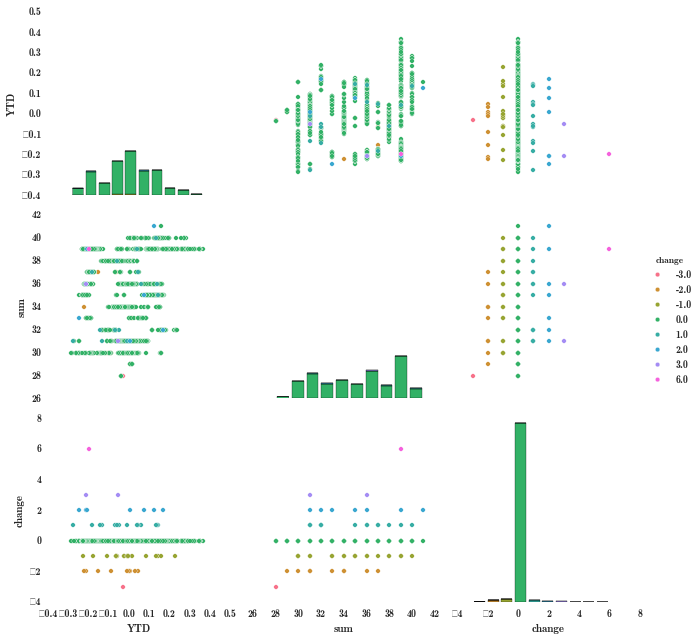

In [210]:
sns.pairplot(fp3, hue='change');

In [ ]:
# I want to use KNN to figure out wither the next analysts action will a upgrade or down grade
# based on 1. the return of a stock price 2. the amount of upgrades/downgrades its been getting 
# The other thing I want to figure out is who is the most influential analyst and would impact other analysts
# Problem is that I might not have enough data here to find anything conclusive 
